In [9]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
#from pandas_profiling import ProfileReport
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

## Load the data

In [14]:
X_train = pd.read_csv("/Users/ikmalsyafiqmahadi/Downloads/Data_Scientist_Assessment/Dataset/Offline/X_train.csv")
y_train = pd.read_csv("/Users/ikmalsyafiqmahadi/Downloads/Data_Scientist_Assessment/Dataset/Offline/y_train.csv")
offline_loc_df = pd.read_csv("/Users/ikmalsyafiqmahadi/Downloads/Data_Scientist_Assessment/Dataset/Offline/PinInfo.csv")

X_test = pd.read_csv("/Users/ikmalsyafiqmahadi/Downloads/Data_Scientist_Assessment/Dataset/Online/X_test.csv")
y_test = pd.read_csv("/Users/ikmalsyafiqmahadi/Downloads/Data_Scientist_Assessment/Dataset/Online/y_test.csv")
online_loc_df = pd.read_csv("/Users/ikmalsyafiqmahadi/Downloads/Data_Scientist_Assessment/Dataset/Online/PinInfo.csv")



## EDA

From this data description we can see that the count varies a lot for each of the BLE receivers which caused by the missing values. The missing values here indicates that there are no signal received by the receivers.
We also can see the from the mean that majority of the reciever has weak signal (less than -80dBM), closer to -98dBm(weak signal) than -40dBm(strong signal). This can indicates that the beacons are positioned further away from the receivers.

In [15]:
X_train.describe()

,CD4533FFC0E1,D2B6503554D7,D7EE034361F8,DD697EA75B68,DF231643E227,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,F8EE8B0847A4,FDAE5980F28C,EC72840D9AD3,E96AF2C858BA,E13B805C6CB0,FB2EE01C18CE
count,1500.000000,1329.000000,1489.000000,1480.000000,1418.000000,1054.000000,836.000000,1153.000000,1387.000000,818.000000,1413.000000,1351.000000,1215.000000,1371.000000,987.000000,1265.000000,633.000000
mean,-85.307795,-85.906442,-86.432911,-86.708529,-86.057089,-84.928891,-85.388299,-88.843995,-83.073399,-86.576718,-84.703182,-86.952298,-86.970494,-83.781197,-86.779707,-85.606172,-89.050662
std,7.447779,5.079135,7.624345,6.356746,7.100093,7.749371,9.042254,6.640661,7.829528,8.676981,7.357371,7.030047,7.515789,7.683391,8.388016,8.331793,6.604332
min,-98.000000,-97.000000,-98.000000,-96.800000,-98.000000,-98.000000,-98.000000,-98.000000,-98.000000,-98.000000,-98.000000,-98.000000,-98.000000,-98.000000,-98.000000,-98.000000,-98.000000
25%,-90.333333,-89.294118,-92.350000,-91.648810,-92.534091,-91.732692,-93.584936,-93.931034,-88.900000,-93.154687,-90.750000,-92.250000,-93.543561,-89.054094,-93.837719,-91.500000,-95.000000
50%,-86.635255,-86.833333,-87.384615,-88.045455,-86.414216,-86.130682,-87.488511,-91.153846,-84.545455,-89.298246,-85.875000,-89.546875,-87.000000,-86.200000,-89.611111,-87.409091,-89.384615
75%,-81.480249,-83.653846,-81.526316,-83.747984,-81.166493,-79.716912,-79.417360,-84.900000,-77.288690,-80.155000,-79.560000,-82.079683,-82.495463,-79.075499,-77.830599,-82.115385,-84.880597
max,-63.967742,-67.121212,-65.500000,-66.818182,-69.000000,-69.000000,-63.626087,-71.888889,-64.970588,-67.476923,-66.107143,-68.941176,-66.097561,-61.191489,-67.560000,-67.395833,-68.000000


The signal strength distribution for each receiver. As we can see, most of the signal skewed to the left
which confirm our assumption earlier that the receivers are positioned further away from the beacons.

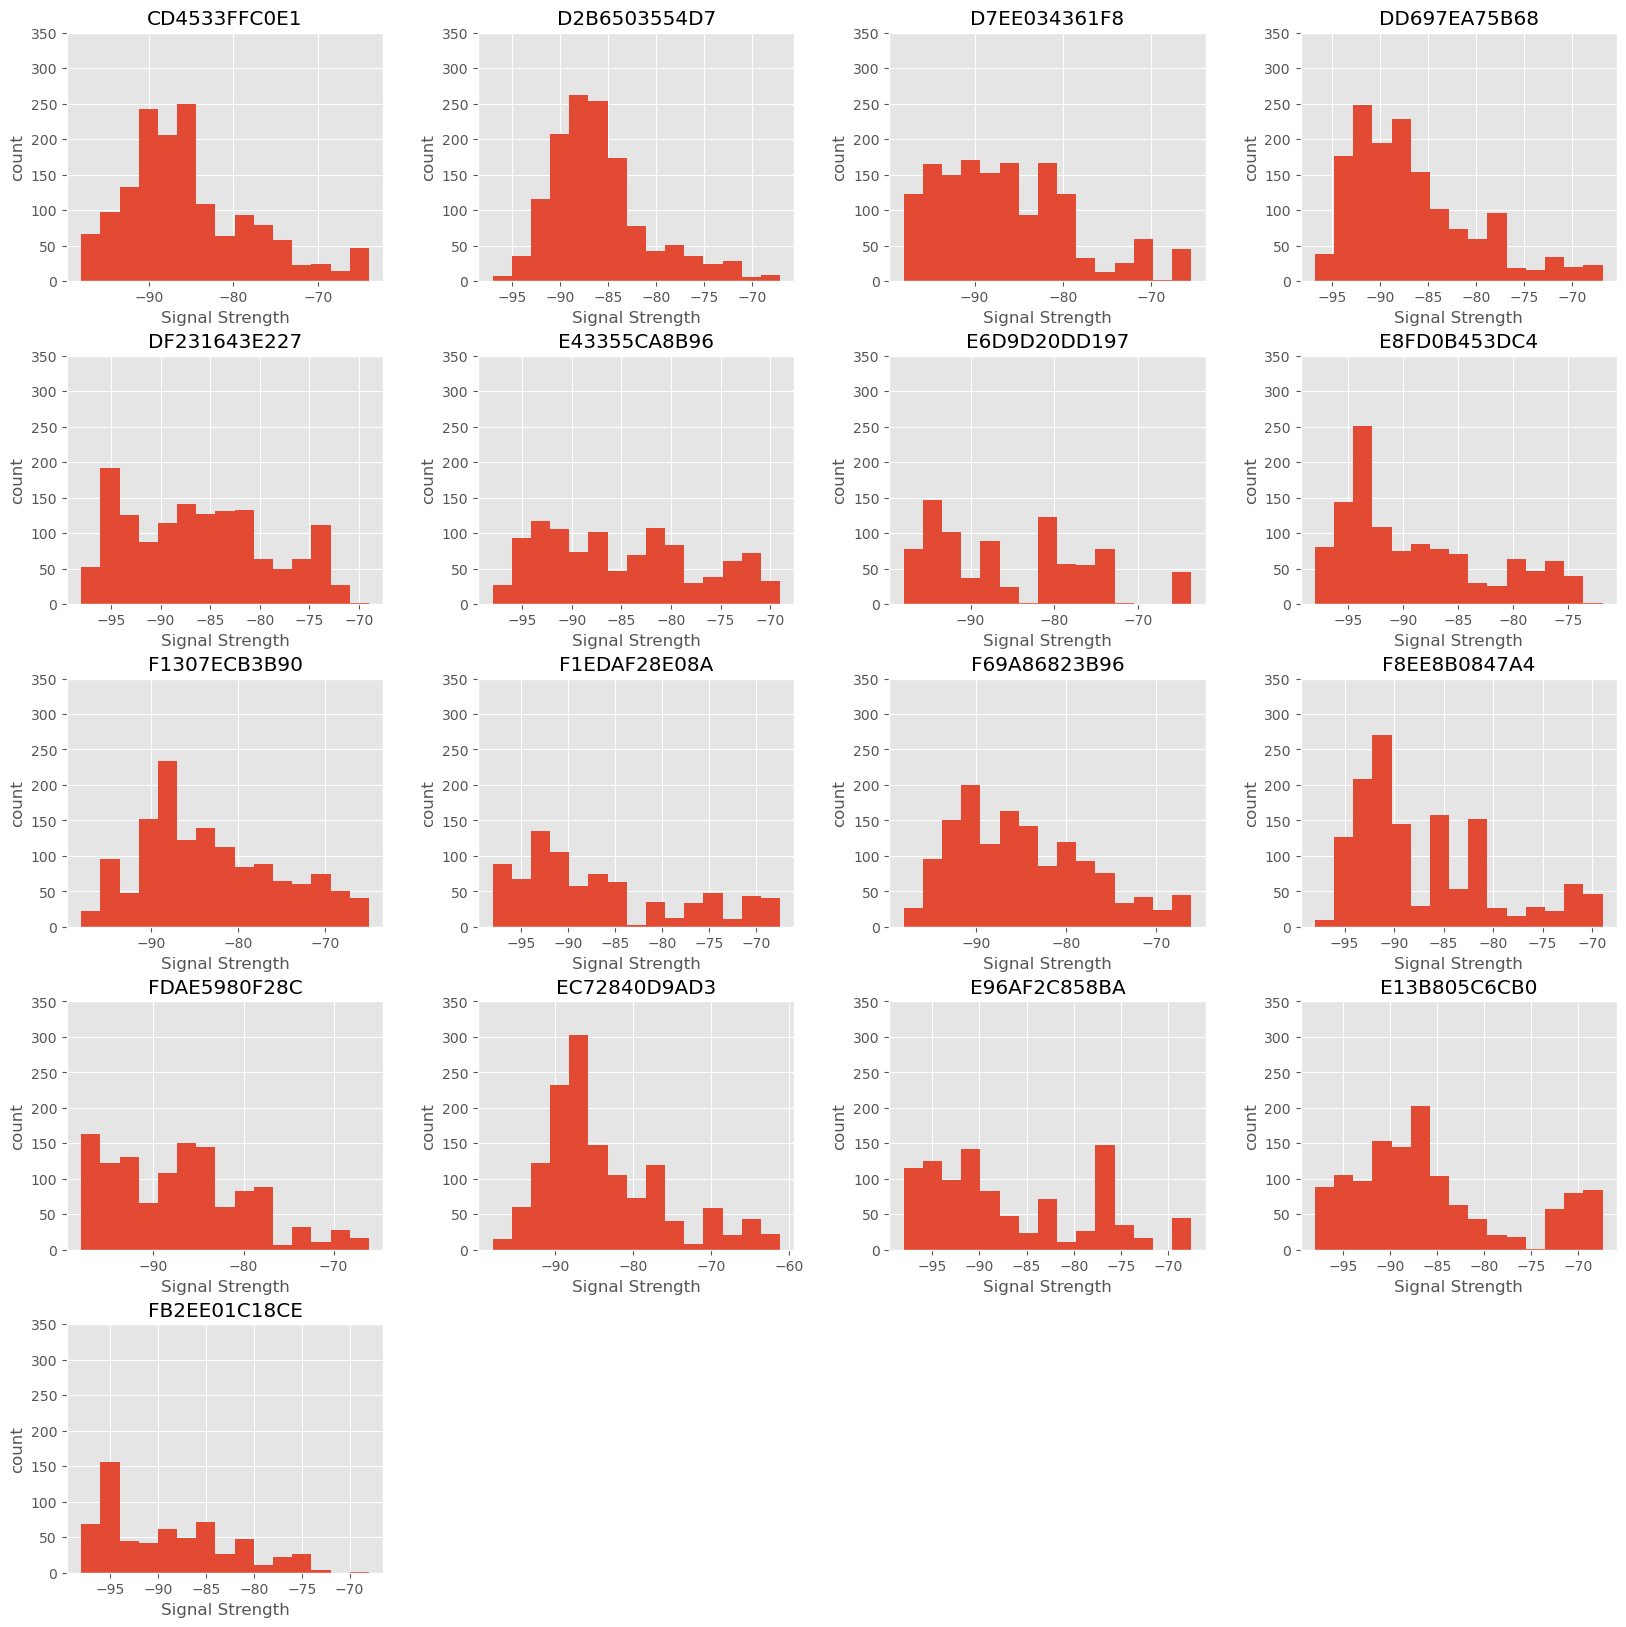

In [16]:
plots = X_train.hist(bins=15, figsize=(20,20))

for ax in plots.flatten():
    ax.set_xlabel("Signal Strength")
    ax.set_ylabel("count")
    ax.axis(ymin=0,ymax=350)

Let see the missing values for each receiver. As we can see the missing values are not evenly distributed. 

For an example, FB2EE01C18CE has 942 missing values while CD4533FFC0E1 only has 75 missing values. 

Since missing values indicates the loss of signal, we can assume that the beacon are not evenly positioned around the receiver or the receivers itself have different range of detections. However, since the train data is from the calibration stage, it is less likely for the beacons to not be evenly distributed and more likely that the recievers have different range of detection. 

In [17]:
X_train.isna().sum()

CD4533FFC0E1     75
D2B6503554D7    246
D7EE034361F8     86
DD697EA75B68     95
DF231643E227    157
E43355CA8B96    521
E6D9D20DD197    739
E8FD0B453DC4    422
F1307ECB3B90    188
F1EDAF28E08A    757
F69A86823B96    162
F8EE8B0847A4    224
FDAE5980F28C    360
EC72840D9AD3    204
E96AF2C858BA    588
E13B805C6CB0    310
FB2EE01C18CE    942
dtype: int64

From the heatmap we can see the correlation between the BLE transmiters. This correlation can indicates the relative location between the BLE transmitters. The lighter color indicates that the two BLE transmitters are close with each other and the darker color indicates that the BLE transmitters are further apart from each other.

<AxesSubplot: >

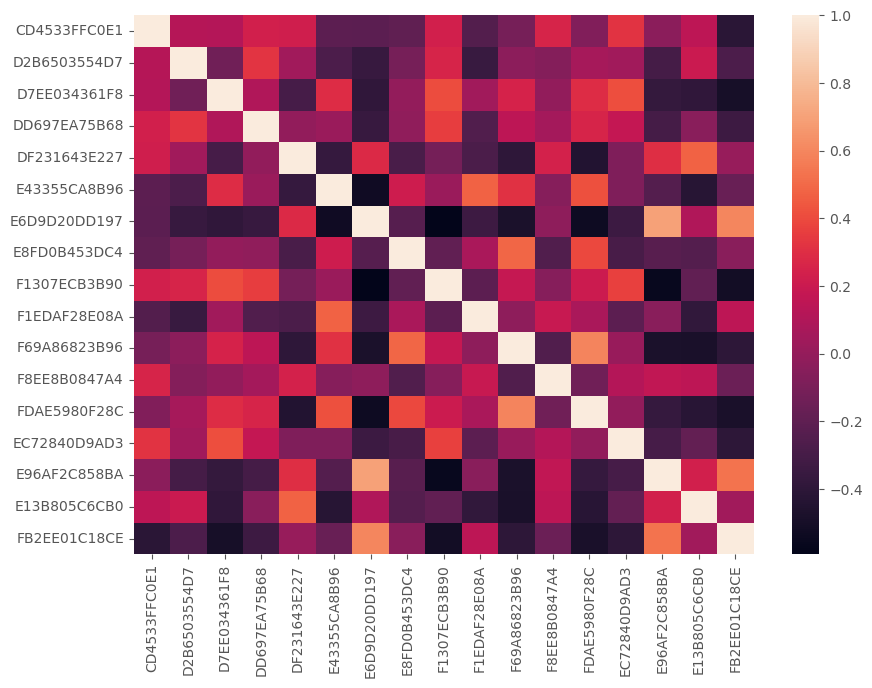

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(X_train.corr(method='kendall'), ax=ax)

Now let see the distribution of our target variable. As we can see our target variable is evenly distributed. This wont cause any class imbalance problem when we feed our model into the machine learning.

<AxesSubplot: >

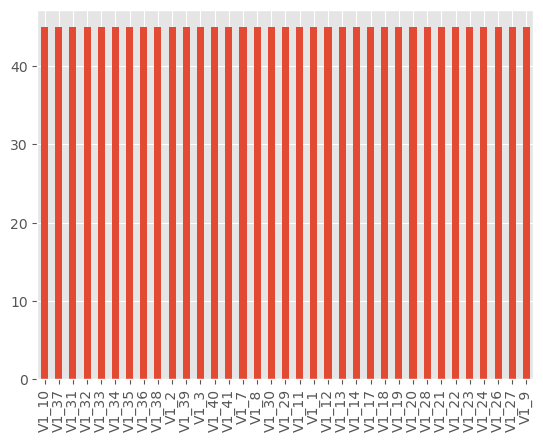

In [19]:
y_train['PinId'].value_counts().plot(kind='bar')

## Data Preprocessing

We want to see what is the proportion of the test dataset to see the train test split test size. The proportion of the test data is 15% of all the data. That seems a reasonable proportion for our ML model.

In [20]:
X_test.shape[0]/(X_test.shape[0]+X_train.shape[0])

0.15594855305466238

Since the null indicates lost of signal, and -98dbm is the weakest signal that we can detect using the received, it is logical to fill up the null values with -100dbm

In [21]:
X_train = X_train.fillna(-100)
X_test = X_test.fillna(-100)

Scale the data to improve prediction performance. 

The reason why we use StandardScaler is that it will results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared = 1.

Deep learning algorithms often call for zero mean and unit variance. Regression-type algorithms also benefit from normally distributed data with small sample sizes. 

Since we are planning to use these models in our prediction, this is a good scaler to use.

In [10]:
trans = StandardScaler()
# standardize the data attributes
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

Since the Y data is actually the reference to the actual position, we subtitute the PinId to its actual x,y location

In [24]:
offline_loc_df['PinId'] = offline_loc_df['pinId']
offline_loc_df = offline_loc_df.drop('pinId',axis = 1)
y_train = pd.merge(y_train, offline_loc_df,
                       how='left', on=['PinId']).drop('PinId',axis = 1)

online_loc_df['PinId'] = online_loc_df['pinId']
online_loc_df = online_loc_df.drop('pinId',axis = 1)
y_test = pd.merge(y_test, online_loc_df,
                       how='left', on=['PinId']).drop('PinId',axis = 1)

We transform the data into array to feed into the model

In [12]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

## Model creation

We will create multiple model namely, Linear Regression, KNeighbour Regressor, DecisionTree Regressor, RandomForest Regressor, DNN and compare their performance

In [15]:
model = [LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
model_name = ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor','DNN']

Since we want to know the distance between the prediction and actual position, we will use euclidean distance method to measure the error between our prediction and ground truth.

In [16]:
def l2_dist(p1, p2):
    x1,y1 = p1
    x2,y2 = p2
    x1, y1 = np.array(x1), np.array(y1)
    x2, y2 = np.array(x2), np.array(y2)
    dx = x1 - x2
    dy = y1 - y2
    dx = dx ** 2
    dy = dy ** 2
    dists = dx + dy
    dists = np.sqrt(dists)
    return np.mean(dists), dists

In [17]:
l2dists_mean_all = []
l2dists_all = []

### Non-deeplearning models

In [18]:
for i in model:   
    lineReg = i
    lineReg.fit(X_train, y_train)
    preds = lineReg.predict(X_test)
    l2dists_mean, l2dists = l2_dist((preds[:, 0], preds[:, 1]), (y_test[:, 0], y_test[:, 1]))
    l2dists_mean_all.append(l2dists_mean)
    l2dists_all.append(l2dists)

### Deeplearning model

In [19]:
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_deep(inp_dim):
    seed = 7
    np.random.seed(seed)
    model = Sequential()
    model.add(Dense(50, input_dim=inp_dim, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(2, activation='linear'))
    model.compile(loss='mse', optimizer=Adam(.001), metrics=['mse'])
    return model

es = EarlyStopping(monitor='val_loss', patience=100, verbose=0, mode='auto', restore_best_weights=True)
model = create_deep(X_train.shape[1])
hist = model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), epochs=1000, batch_size=100,  verbose=0, callbacks = [es])
preds = model.predict(X_test)
l2dists_mean, l2dists = l2_dist((preds[:, 0], preds[:, 1]), (y_test[:, 0], y_test[:, 1]))
l2dists_mean_all.append(l2dists_mean)
l2dists_all.append(l2dists)


Metal device set to: Apple M1


2022-10-14 15:23:32.957161: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-14 15:23:32.958725: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-10-14 15:23:33.475097: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-14 15:23:33.916337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-14 15:23:36.070668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 14ms/step


2022-10-14 15:24:29.445678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


## Model Evaluation

From the graph below we can see that DNN gives us the least mean euclidean distance error. This means that DNN perform the best compared with other models.

Text(0, 0.5, 'Mean euclidean distance error')

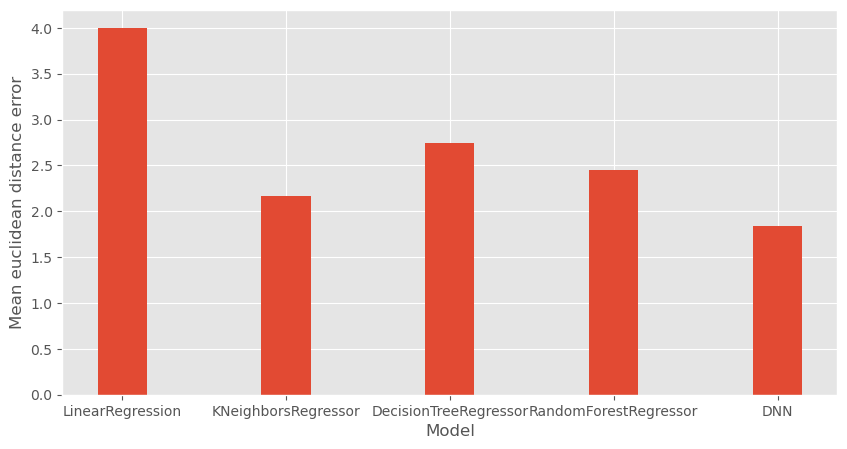

In [20]:
fig = plt.figure(figsize = (10, 5))
plt.bar(model_name, l2dists_mean_all,width = 0.3)
plt.xlabel("Model")
plt.ylabel("Mean euclidean distance error")

We can see that DNN model is significantly better than other models. Specifically it gets to perfect accuracy within 6 meters.

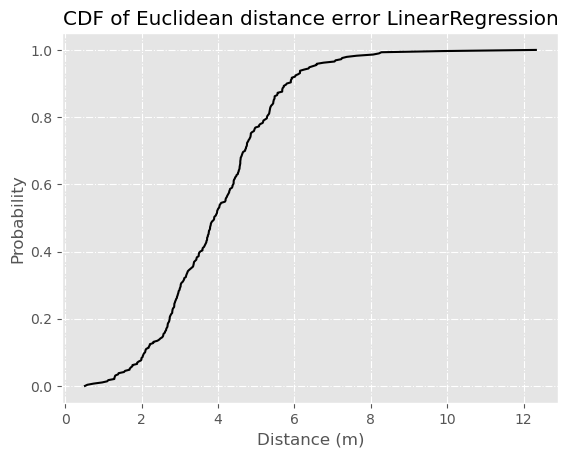

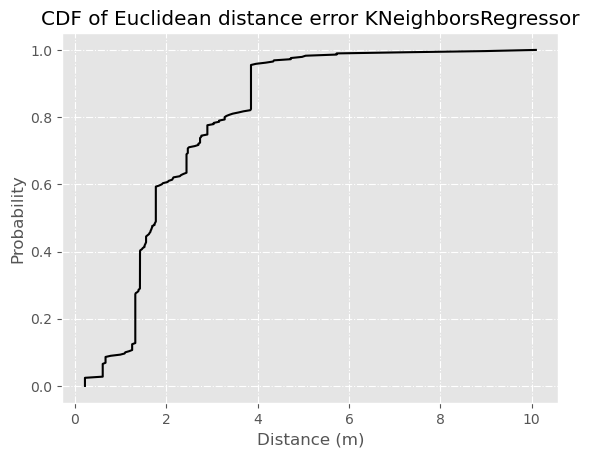

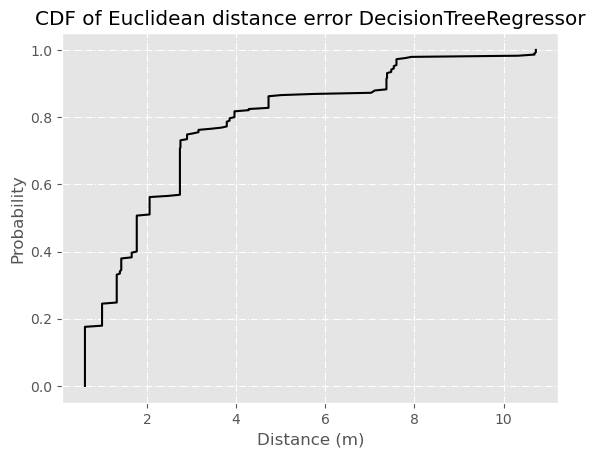

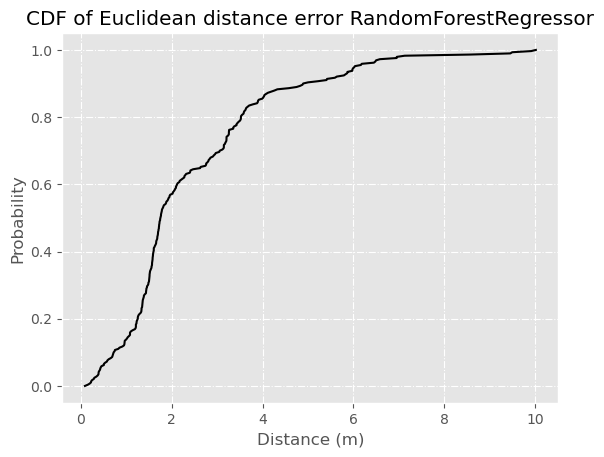

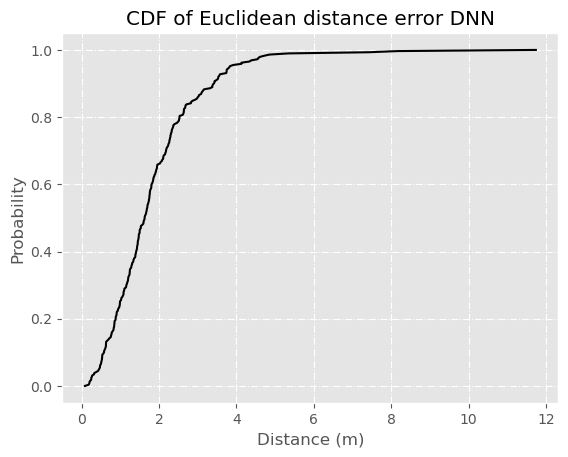

In [21]:
for i in range(0,5):
    sortedl2_deep = np.sort(l2dists_all[i])
    prob_deep = 1. * np.arange(len(sortedl2_deep))/(len(sortedl2_deep) - 1)
    fig, ax = plt.subplots()
    lg1, = ax.plot(sortedl2_deep, prob_deep, color='black')
    plt.title(f'CDF of Euclidean distance error {model_name[i]}')
    plt.xlabel('Distance (m)')
    plt.ylabel('Probability')
    plt.grid(True)
    gridlines = ax.get_xgridlines() + ax.get_ygridlines()
    for line in gridlines:
        line.set_linestyle('-.')

    plt.savefig('Figure_CDF_error.png', dpi=30)
    plt.show()
    plt.close()

## Conclusion

In conclusion, using deep neural network outperforms other machine learning models. The DNN managed to get less than 2m mean distance error while all of other models have more 2m mean distance error. In addition, when analysing the CDF of the Euclidean distance error, DNN manage to get perfect accuracy within 5m while other machine learning models will only get perfect accuracy around 8m. This shows that DNN has almost twice the accuracy from any other machine learning models.

## Further works

Since the DNN model we used has not yet tuned, we can further tune the DNN model to get a better prediction. 

## Submission Prediction

Since we managed to get the best prediction using the DNN model, we will use this model for our submission

In [25]:
X_test_submission = pd.read_csv("/Users/ikmalsyafiqmahadi/Downloads/Data_Scientist_Assessment/Dataset/Online/X_test_submission.csv")
X_test_submission = X_test_submission.fillna(-100)
X_test_submission = trans.transform(X_test_submission)
X_test_submission = np.asarray(X_test_submission)
preds_submission = model.predict(X_test_submission)
y_submission = pd.DataFrame({'X': preds_submission[:,0], 'Y': preds_submission[:,1]})
y_submission.to_csv('submission.csv',  index=False)

9/9 [==============================] - 0s 3ms/step
